
🔹 BELOW 18 RESULTS
               Timestamp      AgeGroup  Deep Cleansing and Moisturizing.  \
6   11/21/2025 21:10:57  Below 18 yrs                                 5   
11  11/21/2025 22:14:07  Below 18 yrs                                 5   
14  11/22/2025 10:54:06  Below 18 yrs                                 5   
20  11/23/2025 10:12:08  Below 18 yrs                                 5   
21  11/28/2025 14:59:32  Below 18 yrs                                 1   
27  11/28/2025 15:03:29  Below 18 yrs                                 3   
29  11/28/2025 15:05:11  Below 18 yrs                                 5   
36  11/28/2025 15:07:51  Below 18 yrs                                 5   
39  11/28/2025 15:11:43  Below 18 yrs                                 3   

    Fruity Smell and Fragrance  Natural/Organic Ingredients  Affordable Price  \
6                            3                            5                 3   
11                           5                            5       

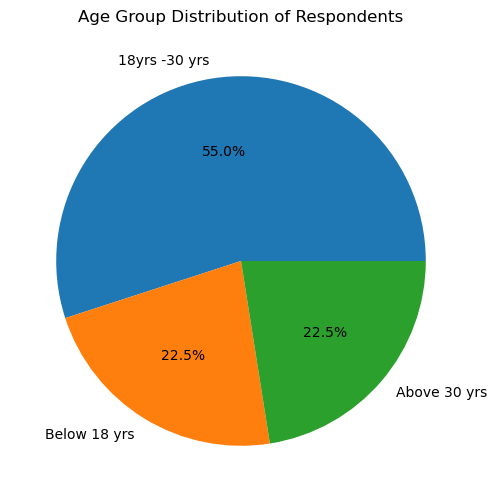

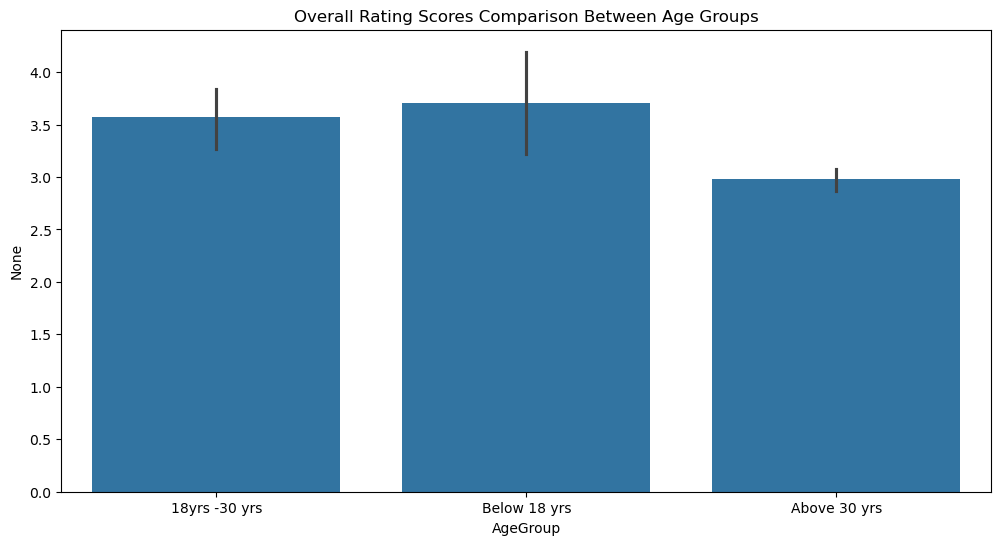

<Figure size 1400x600 with 0 Axes>

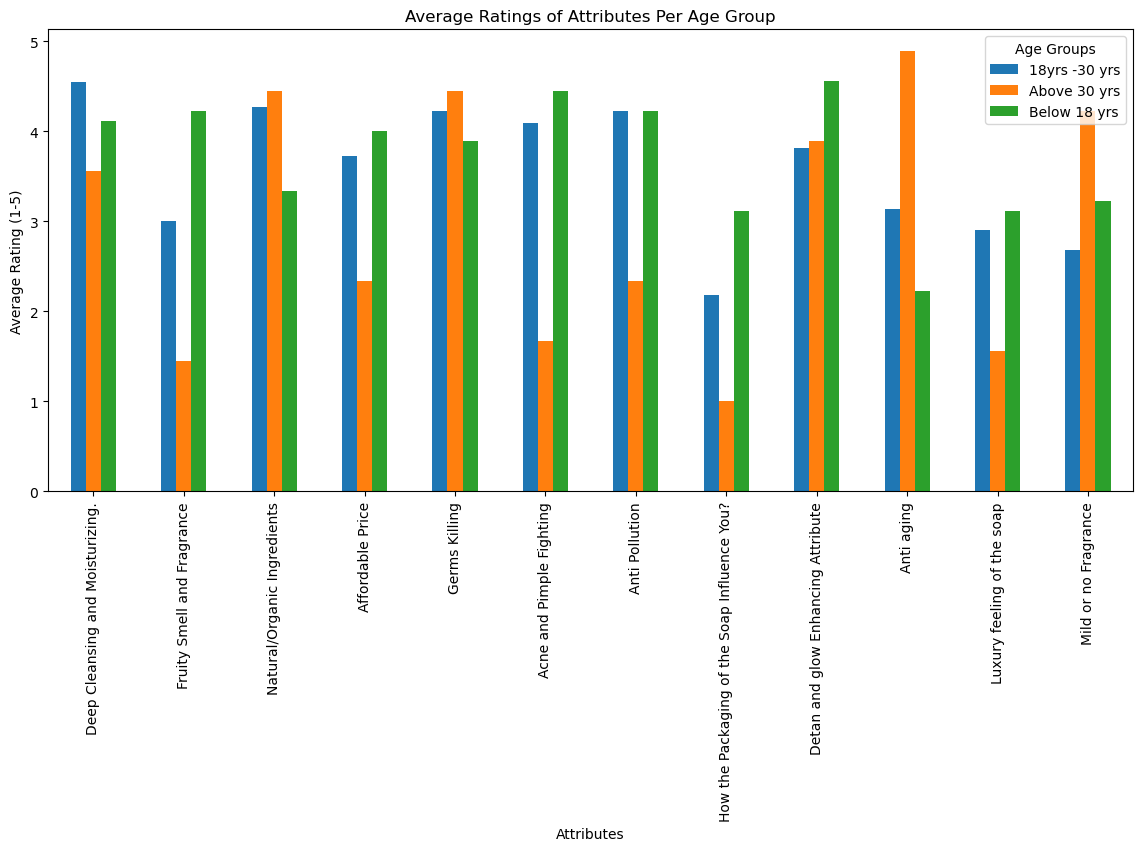

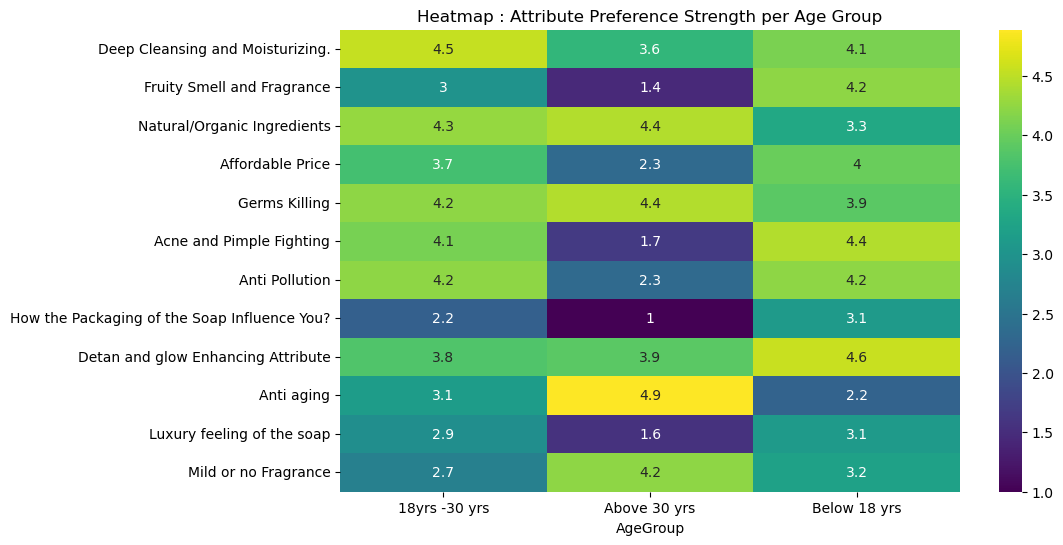

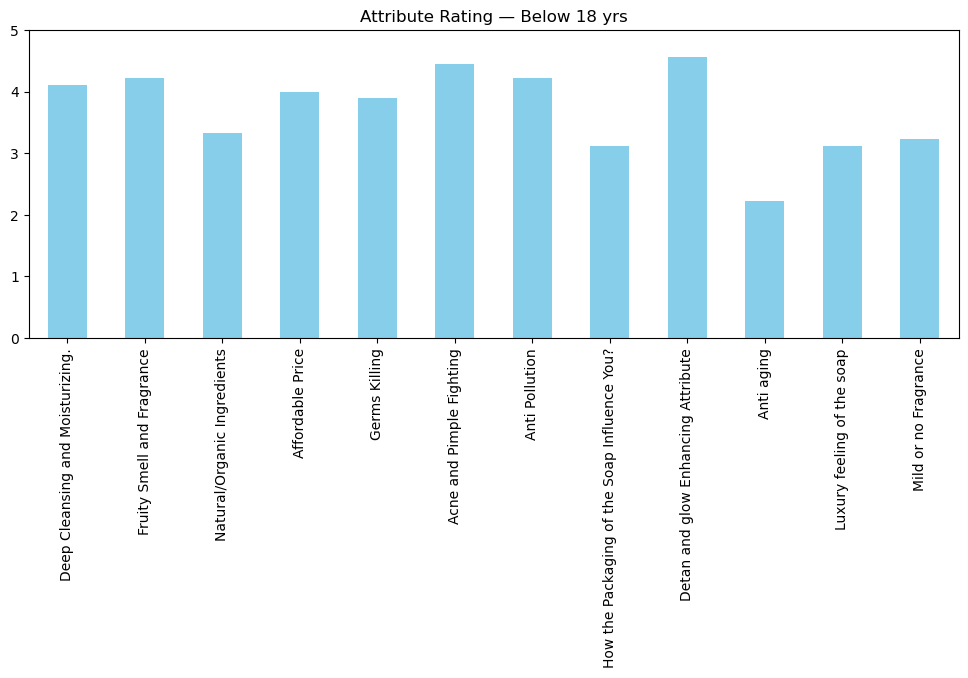

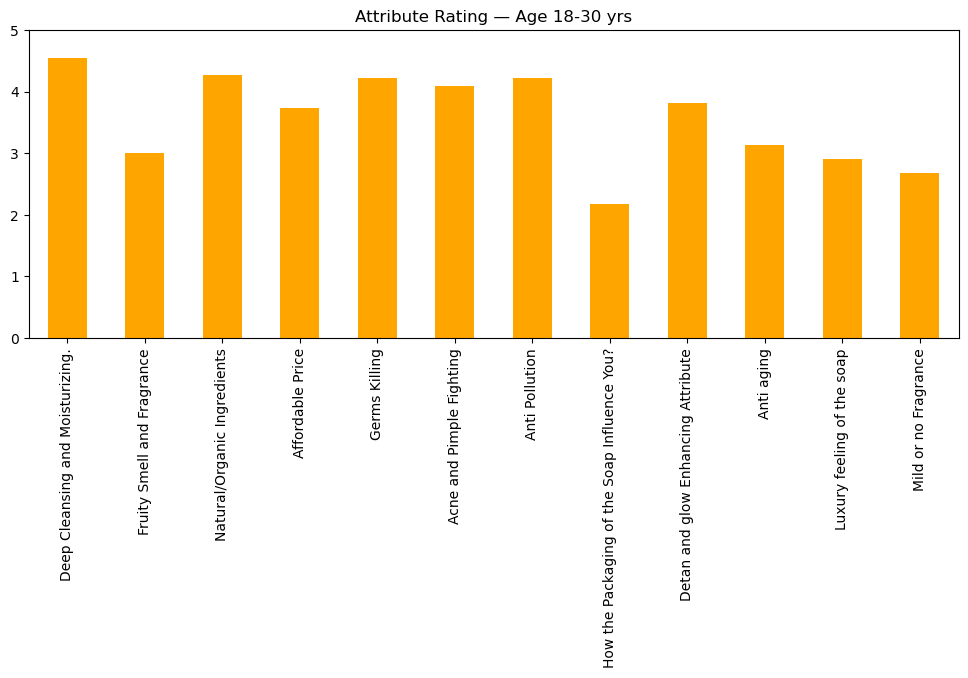

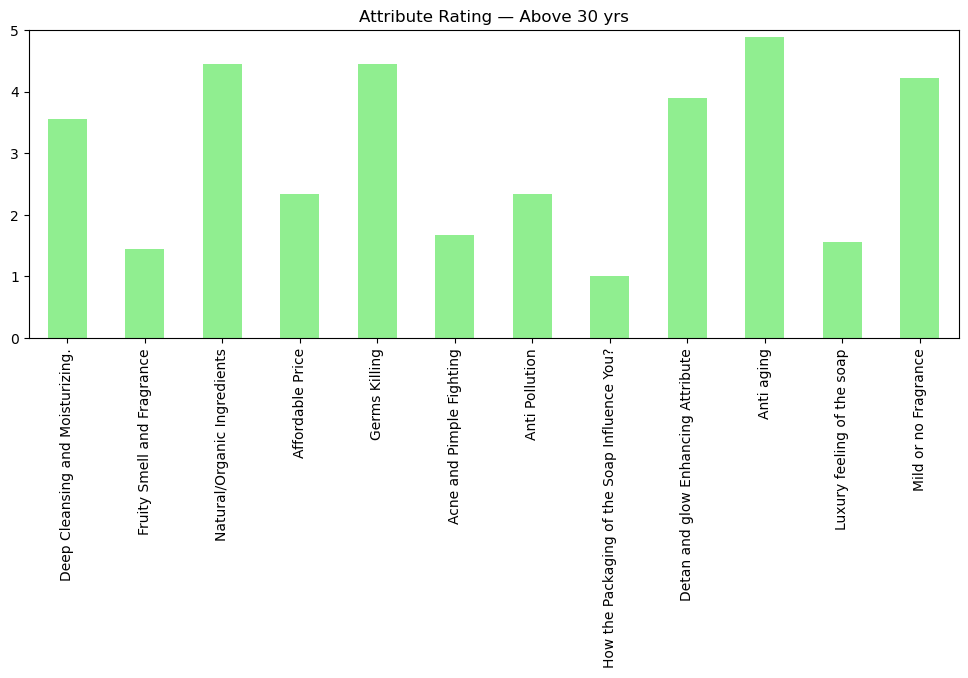

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ================== LOAD CSV ==================
df = pd.read_csv("Form_response.csv")

# Clean & rename age column
df = df.rename(columns={"Which age group do you Belong to?": "AgeGroup"})

# List of rating columns (all except timestamp & age)
rating_cols = df.columns[2:]

# ================== SPLIT GROUPS ==================
below_18 = df[df["AgeGroup"] == "Below 18 yrs"]
age_18_30 = df[df["AgeGroup"] == "18yrs -30 yrs"]
above_30 = df[df["AgeGroup"] == "Above 30 yrs"]

# ================== DISPLAY COMPLETE VALUES ==================
print("\n🔹 BELOW 18 RESULTS\n", below_18)
print("\n🔹 AGE 18 - 30 RESULTS\n", age_18_30)
print("\n🔹 ABOVE 30 RESULTS\n", above_30)


# ================================================================
#                 📊 PIE CHART — AGE GROUP DISTRIBUTION
# ================================================================
plt.figure(figsize=(6,6))
df["AgeGroup"].value_counts().plot(kind="pie", autopct="%1.1f%%")
plt.title("Age Group Distribution of Respondents")
plt.ylabel("")
plt.show()





# ================================================================
#  📈 Individual Attribute Rating Comparison per Age Group (Group Mean)
# ================================================================
age_means = df.groupby("AgeGroup")[rating_cols].mean().T   # Transpose for better bars

plt.figure(figsize=(14,6))
age_means.plot(kind="bar", figsize=(14,6))
plt.title("Average Ratings of Attributes Per Age Group")
plt.xlabel("Attributes")
plt.ylabel("Average Rating (1-5)")
plt.legend(title="Age Groups")
plt.show()


# ================================================================
#                 🔥 HEATMAP — Preference Strength by Age
# ================================================================
plt.figure(figsize=(10,6))
sns.heatmap(age_means, annot=True, cmap="viridis")
plt.title("Heatmap : Attribute Preference Strength per Age Group")
plt.show()


# ================================================================
#            📊 SEPARATE CHARTS FOR EACH GROUP (ALL ATTRIBUTES)
# ================================================================

# ---- Below 18 ----
plt.figure(figsize=(12,4))
below_18[rating_cols].mean().plot(kind="bar", color="skyblue")
plt.title("Attribute Rating — Below 18 yrs")
plt.ylim(0,5)
plt.show()

# ---- Age 18–30 ----
plt.figure(figsize=(12,4))
age_18_30[rating_cols].mean().plot(kind="bar", color="orange")
plt.title("Attribute Rating — Age 18-30 yrs")
plt.ylim(0,5)
plt.show()

# ---- Above 30 ----
plt.figure(figsize=(12,4))
above_30[rating_cols].mean().plot(kind="bar", color="lightgreen")
plt.title("Attribute Rating — Above 30 yrs")
plt.ylim(0,5)
plt.show()
